# Итоговая работа

In [6]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
%matplotlib inline

### 1. Загрузить файл hr.csv

In [11]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [49]:
def stat_values(x):
    print('среднее значение ~ ', round(statistics.mean(x), 2))
    print('медиана ~ ', round(statistics.median(x), 2))
    print('мода ~ ', round(statistics.mode(x), 2))
    print('минимум:', min(x), ', максимум:', max(x))
    print('стандартное отклонение ~', round(statistics.pstdev(x), 2))
    print( 'дисперсия ~', round(statistics.pvariance(x),2) )
    
def stat_values_wo_mode(x):
    print('среднее значение ~ ', round(statistics.mean(x), 2))
    print('медиана ~ ', round(statistics.median(x), 2))
    print('минимум:', min(x), ', максимум:', max(x))
    print('стандартное отклонение ~', round(statistics.pstdev(x), 2))
    print( 'дисперсия ~', round(statistics.pvariance(x),2) )

In [50]:
stat_values(df['satisfaction_level'])

среднее значение ~  0.61
медиана ~  0.64
мода ~  0.1
минимум: 0.09 , максимум: 1.0
стандартное отклонение ~ 0.25
дисперсия ~ 0.06


In [41]:
stat_values(df['last_evaluation'])

среднее значение равно  0.72
медиана равна  0.72
мода равна  0.55
минимум: 0.36 , максимум: 1.0
стандартное отклонение ~ 0.17
дисперсия ~ 0.03


In [42]:
stat_values(df['number_project'])

среднее значение равно  3.8
медиана равна  4
мода равна  4
минимум: 2 , максимум: 7
стандартное отклонение ~ 1.23
дисперсия ~ 1.52


In [48]:
#у показателя числа часов в месяц нет моды
stat_values_wo_mode(df['average_montly_hours'])

среднее значение равно  201.05
медиана равна  200
минимум: 96 , максимум: 310
стандартное отклонение ~ 49.94
дисперсия ~ 2494.15


In [45]:
stat_values(df['time_spend_company'])

среднее значение равно  3.5
медиана равна  3
мода равна  3
минимум: 2 , максимум: 10
стандартное отклонение ~ 1.46
дисперсия ~ 2.13


In [46]:
stat_values(df['Work_accident'])

среднее значение равно  0.14
медиана равна  0
мода равна  0
минимум: 0 , максимум: 1
стандартное отклонение ~ 0.35
дисперсия ~ 0.12


In [47]:
stat_values(df['promotion_last_5years'])

среднее значение равно  0.02
медиана равна  0
мода равна  0
минимум: 0 , максимум: 1
стандартное отклонение ~ 0.14
дисперсия ~ 0.02


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [54]:
round(df.corr(),2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


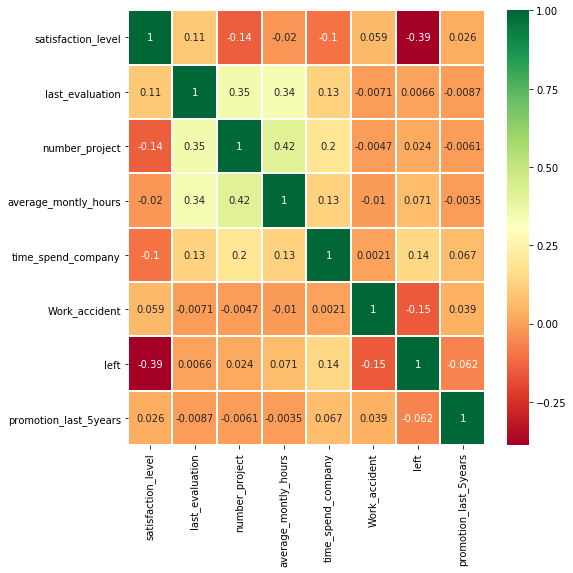

In [52]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=1.0)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными

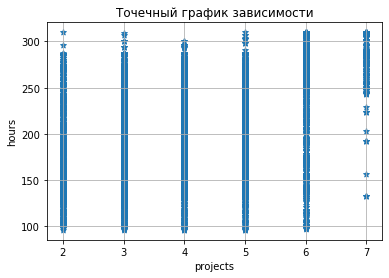

In [60]:
#число проектов и среднее число часов
hours = df['average_montly_hours']
projects = df['number_project']
plt.xlabel('projects')
plt.ylabel('hours')
plt.title('Точечный график зависимости')
plt.grid(True)
plt.scatter(projects, hours, marker='*')

Число проектов - дискретная величина и потому график не очень красивый. Зато довольно хорошо видно, что на 6 проектах сотрудников с низким числом часов становится меньше и на 7 проектах таких единицы (видимо проекты не большие или халатно относятся). При этом количество сотрудников с максимальным числом часов растет по мере роста у них числа проектов

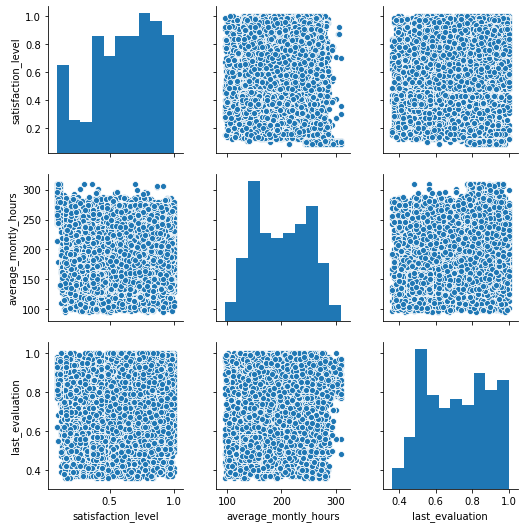

In [63]:
sns_plot = sns.pairplot(
    df[['satisfaction_level', 'average_montly_hours', 'last_evaluation']])
sns_plot

Судя по графикам все очень индивидуально. Но кое-что мы видим:
* на максимальном уровне часов работают в основном те, у кого значение last_evaluation выше - т.е. по каким-то причинам они поддерживают уровень своей активности, вероятно в ожидании повышения. При этом есть те, кто имел невысокую оценку, но тоже проводит на работе много часов - вроятно, работают над исправлением оценки

* уровень удовлетворенности резко падает на максимальном значении часов. Вероятно это те, у кого оценка невысокая, но этот тезис требует проверки

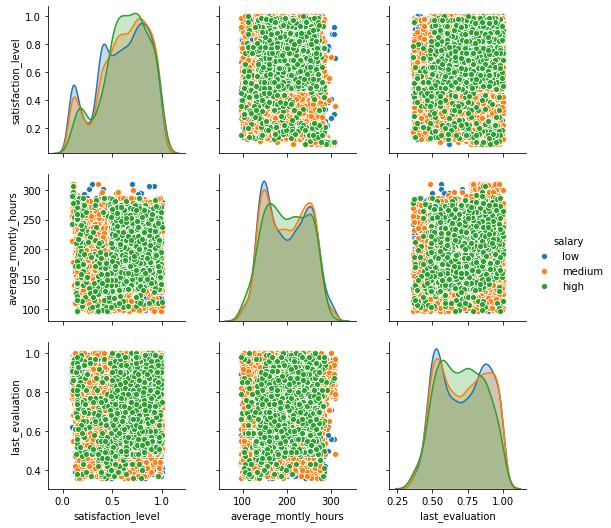

In [64]:
#посомтрим те же показатели в контексте уровня заработной платы

df_special = df[[ 'satisfaction_level', 'average_montly_hours', 'last_evaluation', 'salary' ]]
fig = sns.pairplot(data=df_special, hue='salary')
plt.show()

несколько инсайдов:
* есть несколько сотрудников с низкой зарплатой, которые сильно перерабатывают и очень удовлетворены. Энтузиасты
* есть несколько сотрудников с высоким уровнем удовлетворенности, высокой зарплатой и низкой оценкой
* верхнюю границу значений часов работы занимают в основном сотрудники со средней зарлатой
* у сотрудников со средней и низкой зарплатой частотный график оценки и числа часов имеет два пика - в основном сотрудники делают или выше среднего или ниже среднего
* высокий уровень дохода не оозначает ни высокую удовлетворенность, ни высокую оценку

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

##### число часов для сотрудников с высокой и низкой зарплатой

In [73]:
high_wage = df[df['salary']=='high']['average_montly_hours']
low_wage = df[df['salary']=='low']['average_montly_hours']

stats.ttest_ind(high_wage, low_wage)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

p-value равен 0.46, что больше 0.05, что означает что нет статистических различий (выборки похожи) в числе отработанных часов у сотрудников с высокой и низкой зарлатой. t-value равен -0.72, значения часов выборках повторяются

##### число часов для сотрудников с высокой и низкой удовлетворенностью

In [81]:
high_sat = df[df['satisfaction_level'] <= statistics.median(df['satisfaction_level']) ]['average_montly_hours']
low_sat = df[df['satisfaction_level'] > statistics.median(df['satisfaction_level']) ]['average_montly_hours']

stats.ttest_ind(high_sat, low_sat)

Ttest_indResult(statistic=-14.071539030936366, pvalue=1.093229096033344e-44)

p-value стремится к нулю, что означает что выборки отличаются - число часов у сотрудников с разной удовлетворенностью разное.  t-value равен -0.72, значения часов выборках существенно различаются

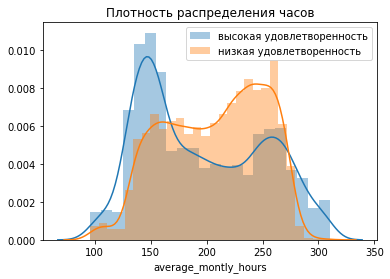

In [82]:
#проверим графически
sns.distplot(high_sat)
sns.distplot(low_sat)
plt.title('Плотность распределения часов')
plt.legend(['высокая удовлетворенность', 'низкая удовлетворенность'])
plt.show()

##### число проектов в зависимости от стажа

In [83]:
new_employees = df[df['time_spend_company'] <= 2]['number_project']
experienced = df[df['time_spend_company'] > 2]['number_project']

stats.ttest_ind(new_employees, experienced)

Ttest_indResult(statistic=-6.042645948080801, pvalue=1.5519519618935668e-09)

p-value стремится к нулю, выборки отличаются - число проектов у сотрудников с разным стажем разное. Причем t равен -6 - различия существенны. 
Число проектов - дискретная величина, проверим ее распределение, не нужно ли применять критерий Манна-Уитни

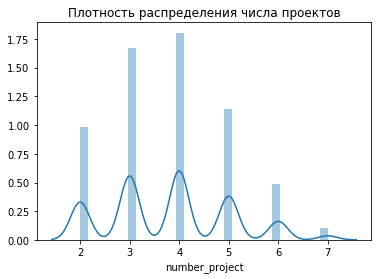

In [80]:
sns.distplot(df['number_project'])
plt.title('Плотность распределения числа проектов')
plt.show()

Распределение похоже на нормальное со смещением влево.

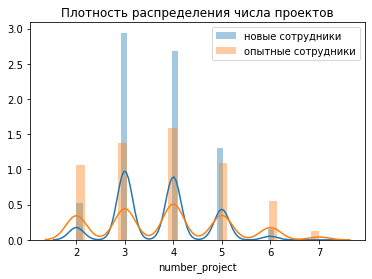

In [84]:
sns.distplot(new_employees)
sns.distplot(experienced)
plt.title('Плотность распределения числа проектов')
plt.legend(['новые сотрудники', 'опытные сотрудники'])
plt.show()

Наглядно видно, что 3-4 проекта гораздо чаще встречается у сотрудников со стажем меньше двух лет, тогда как 6-7 проектов - у более опытных сотрудников. Все равно посчитаем критерий Манна-Уитни

In [86]:
u, p_value = stats.mannwhitneyu(new_employees, experienced)
print("two-sample mannwhitneyu-test", p_value)

two-sample mannwhitneyu-test 3.768680151820965e-06


Результат ожидаемо подтвердился. Выборки различаются

### 6. Рассчитать сколько работников работает в каждом департаменте

In [89]:
employees_by_dept = df['sales'].groupby(df['sales']).count()
employees_by_dept

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: sales, dtype: int64

### 7. Показать распределение сотрудников по зарплатам

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

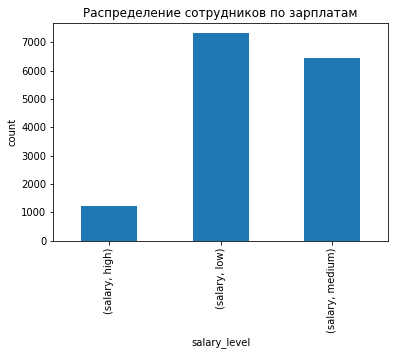

In [105]:
employees_by_salary = df.groupby('salary')[['salary']].count()
employees_by_salary.unstack().plot(kind='bar')
plt.xlabel('salary_level')
plt.ylabel('count')
plt.title('Распределение сотрудников по зарплатам')

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам и департаментам')

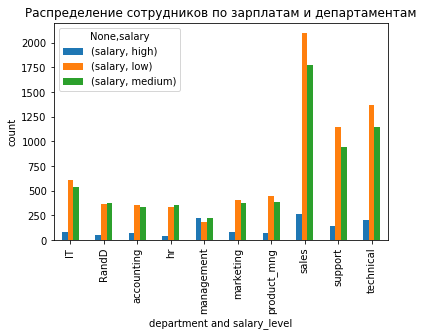

In [130]:
employees_by_salary_dept = df.groupby(['sales', 'salary'])[['salary']].count()
employees_by_salary_dept.unstack().plot(kind='bar')
plt.xlabel('department and salary_level')
plt.ylabel('count')
plt.title('Распределение сотрудников по зарплатам и департаментам')

### 9. Сколько сотрудников покинули компанию

In [133]:
df['left'][df['left'] == 1].count()

3571

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

##### Гипотеза 1: ушедшие сотрудники перерабатывали

In [134]:
lefts = df[df['left']==1]['average_montly_hours']
current = df[df['left']==0]['average_montly_hours']

stats.ttest_ind(lefts, current)

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

In [136]:
u, p_value = stats.mannwhitneyu(lefts, current)
print("two-sample mannwhitneyu-test", p_value)

two-sample mannwhitneyu-test 6.384782992177166e-09


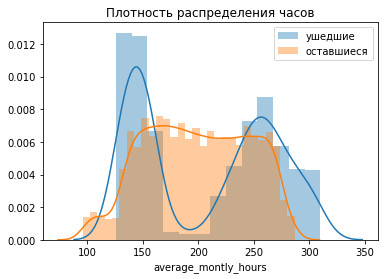

In [137]:
sns.distplot(lefts)
sns.distplot(current)
plt.title('Плотность распределения часов')
plt.legend(['ушедшие', 'оставшиеся'])
plt.show()

Вывод: 
* Гипотеза частично подтверждается
* распределение часов у ушедших и оставшихся сотрудников разное, выборки не похожи. Ушедшие сотрудники работали или существенно меньше среднего или больше среднего, в то время как часы у оставшихся сотрудников распределены близко к нормальному
* можно предположить, что число часов влияет на уход, но не всегда дело в переработках - скорее может быть фактор недонагрузки

##### Гипотеза 2: ушедшие сотрудники были не удовлетворены работой

In [147]:
lefts_2 = df[df['left']==1]['satisfaction_level']
current_2 = df[df['left']==0]['satisfaction_level']

stats.ttest_ind(lefts_2, current_2)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [148]:
u, p_value = stats.mannwhitneyu(lefts_2, current_2)
print("two-sample mannwhitneyu-test", p_value)

two-sample mannwhitneyu-test 0.0


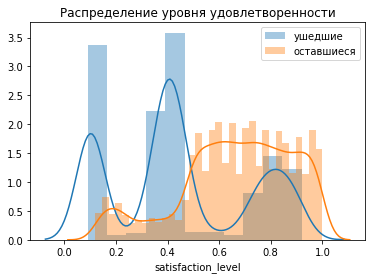

In [149]:
sns.distplot(lefts_2)
sns.distplot(current_2)
plt.title('Распределение уровня удовлетворенности')
plt.legend(['ушедшие', 'оставшиеся'])
plt.show()

Вывод:
* Гипотеза подтверждается
* Уровень удовлетворенности у ушедших и текущих сотрудников принципиально разный - p-value равен 0, t равен -51.6 . Ожидаемо. Можно предположить, что низкий уровень удовлетворенности влияет на решение об уходе
* На графике четко видно, что есть часть текущих сотрудников в зоне риска - в зоне, где чаще всего встречались значения ушедших сотрудников. При этом уходили и сотрудники с выскоим уровнем удовлетворенности - также ожидаемо, вероятно это высококвалифицированные сотрудники настроенные на дальнейший профессиональный рост

##### Гипотеза 3 - уходили сотрудники с низкой последней оценкой

In [150]:
lefts_3 = df[df['left']==1]['last_evaluation']
current_3 = df[df['left']==0]['last_evaluation']

stats.ttest_ind(lefts_3, current_3)

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

In [151]:
u, p_value = stats.mannwhitneyu(lefts_3, current_3)
print("two-sample mannwhitneyu-test", p_value)

two-sample mannwhitneyu-test 0.3825174633239001


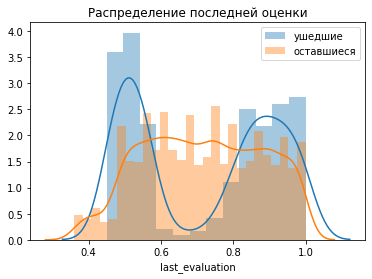

In [152]:
sns.distplot(lefts_3)
sns.distplot(current_3)
plt.title('Распределение последней оценки')
plt.legend(['ушедшие', 'оставшиеся'])
plt.show()

Вывод:
* гипотеза не подтверждается
* можно предположить, что последняя оценка не влияет на уход. p-value равен 0.42 на ttest, это очень высокий результат - выборки похожи. Критерий Манна-Уитни также дает высокий результат.
* График похож на график с нагрузкой в часах, с небольшими различиями - в обоих разница в "середине", но на текущем графике меньшще различий в других областях. Уходили люди как с низкой, так и с высокой оценкой - причем визуально кажется что людей с высокой оценкой ушло больше

### Используем Random Forest для поиска значимых факторов ухода

In [154]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


добавим две колонки с классом - ушел / не ушел сотрудник, а также "оцифруем" уровень зарплаты

In [208]:
def leave(a):
    if a == 1:
        return 1
    else:
        return 0
    
def not_leave(a):
    if a == 1:
        return 0
    else:
        return 1
    
def salary_level(a):
    if a == 'low':
        return 1
    elif a == 'medium':
        return 2
    else:
        return 3

In [209]:
df['salary_level'] = df['salary'].apply(salary_level)
df['leave'] = df['left'].apply(leave)
df['not_leave'] = df['left'].apply(not_leave)
df[df['left']==1].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,leave,not_leave,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0,1


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
leave                    14999 non-null int64
not_leave                14999 non-null int64
salary_level             14999 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 1.5+ MB


13 колонок, две теперь лишние - left и salary. Также уберем департамент, т.к. проверяем гипотезу для всей компании

In [226]:
df_upd = df.iloc[ : ,  [0,1,2,3,4,5,7,12,10,11]  ]
df_upd.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_level,leave,not_leave
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,2,1,0
2,0.11,0.88,7,272,4,0,0,2,1,0
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


In [227]:
df_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
salary_level             14999 non-null int64
leave                    14999 non-null int64
not_leave                14999 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


Число строк не поменялось, лишние колонки ушли. Работаем с этим. Первые 9 колонок - атрибуты, последние 2 - классы, которые будут для нас target value

In [231]:
output_y = df_upd.iloc[:,8:]
input_x = df_upd.iloc[:,:8]

In [232]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

not_leave    11428
leave         3571
dtype: int64


Разделим датасэт на тенировочные и тестовые данные, разделим в пропорции на 75/25

In [233]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_x, Y, test_size=0.25)

No handles with labels found to put in legend.


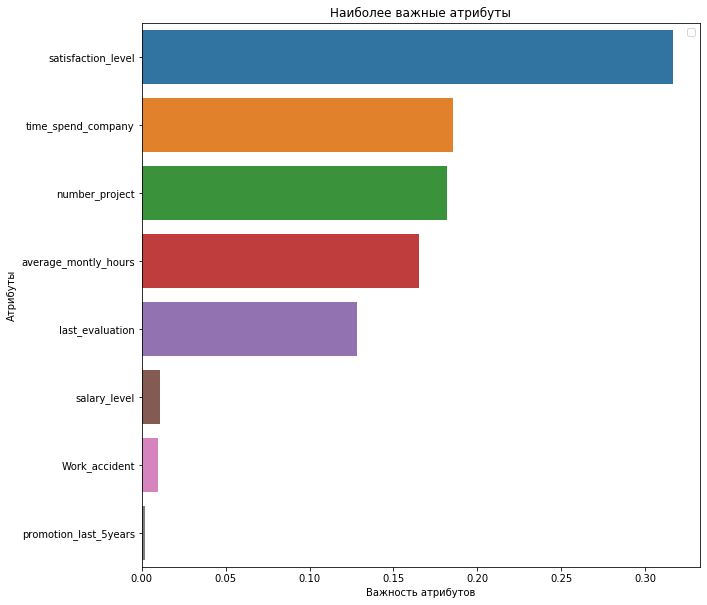

In [238]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель random forest
model=RandomForestClassifier(n_estimators=500)

# обучаем модель
model.fit(x_train,y_train)

headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [239]:
model.score(x_test, y_test)

0.9898666666666667

Очень высокая точность в работе модели - ~99%

Вывод:
* модель Random Forest подтверждает гипотезу, что компанию покидают сотрудники с низкой удовлетворенностью. Очевидный вывод, подтвержденный статистически
* сам по себе показатель уровня зарплаты не влияет на принятие решения об уходе, но вероятно может влиять на уровень удовлетворенности
* второй и третий по значимости факторы - время проведенное в компании и число проектов. Проверим через ttest

##### Гипотеза 4 - уходят люди с большим числом проектов

In [240]:
lefts_4 = df[df['left']==1]['number_project']
current_4 = df[df['left']==0]['number_project']

stats.ttest_ind(lefts_4, current_4)

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)

In [241]:
u, p_value = stats.mannwhitneyu(lefts_4, current_4)
print("two-sample mannwhitneyu-test", p_value)

two-sample mannwhitneyu-test 0.008345878306054643


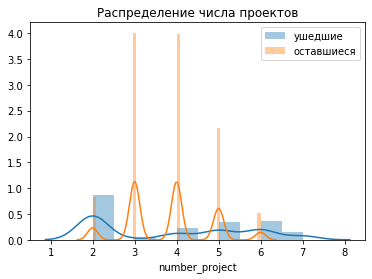

In [242]:
sns.distplot(lefts_4)
sns.distplot(current_4)
plt.title('Распределение числа проектов')
plt.legend(['ушедшие', 'оставшиеся'])
plt.show()

Вывод:
* гипотеза частично подтверждается - уходили сотрудники с число проектов, отличным от среднего
* число проектов у ушедших и оставшихся сотрудников разное, выборки не похожи - p-value стремится к 0.
* судя по графику, речь идет скорее о недозагруженности - большинство ушедших имело 2 проекта. Из оставшихся у такого же числа сотрудников только 2 проекта, они в зионе риска 

##### Гипотеза 5 - уходят люди с большим стажем

In [243]:
lefts_5 = df[df['left']==1]['time_spend_company']
current_5 = df[df['left']==0]['time_spend_company']

stats.ttest_ind(lefts_5, current_5)

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)

In [244]:
u, p_value = stats.mannwhitneyu(lefts_5, current_5)
print("two-sample mannwhitneyu-test", p_value)

two-sample mannwhitneyu-test 4.330385960458912e-238


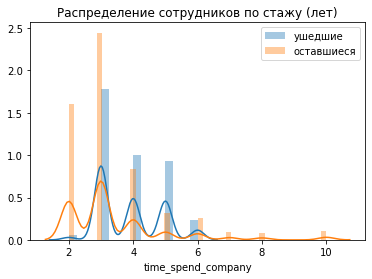

In [246]:
sns.distplot(lefts_5)
sns.distplot(current_5)
plt.title('Распределение сотрудников по стажу (лет)')
plt.legend(['ушедшие', 'оставшиеся'])
plt.show()

Вывод:
* Гипотеза подтверждается. Выборки не похожи - p-value стремится к нулю, значение t равно 17.9 . 
* У компании есть какие-то проблемы с удержанием сотрудников - с третьего года наблюдается большое число увольнений